In [132]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt 
import seaborn as sns
from sklearn.preprocessing import StandardScaler
%matplotlib inline

In [143]:
np.random.seed(69)
data = np.random.normal(0, 10, 500)

In [134]:
data = data.reshape([-1, 2])

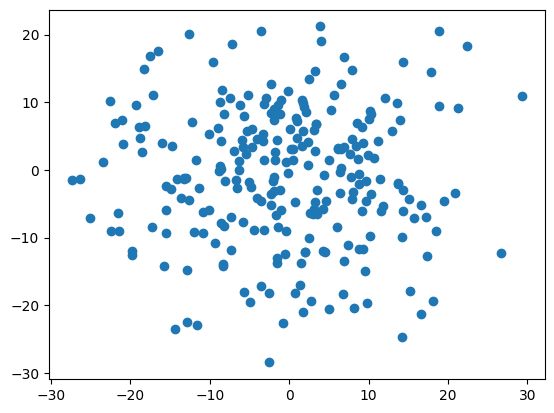

In [135]:
df = pd.DataFrame(data)

plt.scatter(df[0], df[1])

In [136]:
#Centering the data
df[0]-=df[0].mean()
df[1]-=df[1].mean()

In [137]:
cov_mat = np.cov(df, rowvar=False)

In [138]:
eigenvalues, eigenvectors = np.linalg.eig(cov_mat)

In [139]:
sorted_indices = np.argsort(eigenvalues)[::-1]
eigenvalues = eigenvalues[sorted_indices]
eigenvectors = eigenvectors[:, sorted_indices]

In [140]:
principal_component = np.dot(data, eigenvectors)
pca = pd.DataFrame(principal_component)

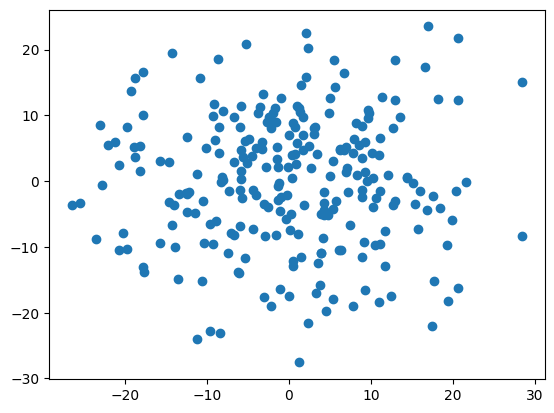

In [141]:
plt.scatter(pca[0], pca[1])
plt.show()

In [142]:
print(pca[0].var(), pca[1].var())

118.56993245364167 100.83486603979635


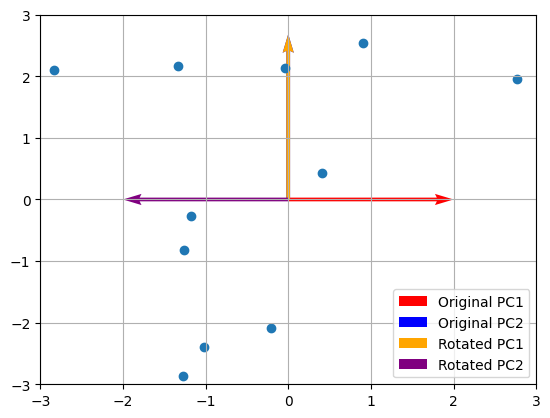

In [159]:
pcaarr = np.array(pca)

u = np.array([1, 0])
v = np.array([0, 1])

angle = 90
theta = np.radians(angle)

rotation = np.array([
    [np.cos(theta), -np.sin(theta)],
    [np.sin(theta),  np.cos(theta)]
])

rotated_u = rotation @ u
rotated_v = rotation @ v

plt.xlim(-3, 3)
plt.ylim(-3, 3)

plt.quiver(0, 0, u[0], u[1], color='r', label='Original PC1', scale=3)
plt.quiver(0, 0, v[0], v[1], color='b', label='Original PC2', scale=3)
plt.quiver(0, 0, rotated_u[0], rotated_u[1], color='orange', label='Rotated PC1', scale=3)
plt.quiver(0, 0, rotated_v[0], rotated_v[1], color='purple', label='Rotated PC2', scale=3)

plt.scatter(pcaarr[:, 0], pcaarr[:, 1])
plt.grid()
plt.legend()